# Partial Solution: Classical Time Series Modeling

## Moving Average

In [1]:
# This code imports the data you generated before for replicating.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


diff_T = pd.read_csv('diff_T.csv')
diff_T = diff_T.set_index('timestamp')

In [2]:
split = int(len(diff_T.values)*0.95)
diff_train_T = diff_T.iloc[:split]
diff_test_T = diff_T.iloc[split:]

Looking at the acf that we have in the first project, it can be observed that there is a significant spikes at some lags and we choose lag 4 for short moving aver‐ age model and 13 for long moving average for AT&T. In moving average, the longer the window you pick, the less volatile the result will be.

In [3]:
short_moving_average_T = diff_T.rolling(window=4).mean()
long_moving_average_T = diff_T.rolling(window=13).mean()

Now, let's see how the prediction looks like based on MA model. It turns out MA model with short lag provides better fit as expected.

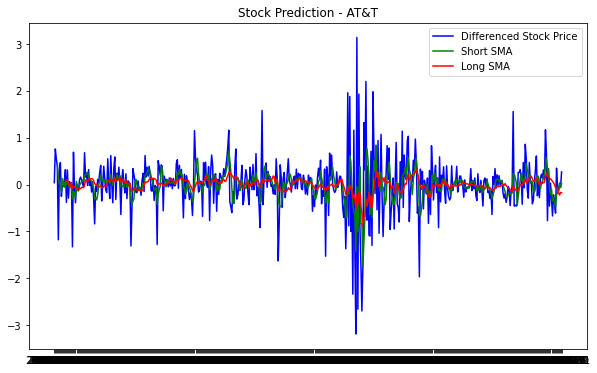

In [4]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(diff_T.index, diff_T, label='Differenced Stock Price',c='b')
ax.plot(short_moving_average_T.index, short_moving_average_T, label = 'Short SMA',c='g')
ax.plot(long_moving_average_T.index, long_moving_average_T, label = 'Long SMA',c='r')
ax.legend(loc='best')
ax.set_title('Stock Prediction - AT&T')
plt.show()

In [5]:
from sklearn.metrics import mean_squared_error

In [6]:
def rmse(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [7]:
short_moving_average_T.dropna(inplace=True)

As confirmed by line plot, RMSE of AT&T with short lag outperforms the one with long lag.

In [8]:
print('RMSE of AT&T for Short SMA {:.4f}'\
      .format(rmse(diff_T.iloc[3:],short_moving_average_T.dropna())))

RMSE of AT&T for Short SMA 0.5052


In [9]:
long_moving_average_T.dropna(inplace=True)

In [10]:
print('RMSE of AT&T for Long SMA {:.4f}'\
      .format(rmse(diff_T.iloc[12:],long_moving_average_T)))

RMSE of AT&T for Long SMA 0.5523
